In [108]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

SyntaxError: invalid syntax (908586297.py, line 6)

# Reuters-21578

In [43]:
 'C:/Users/jesse/OneDrive/Bureaublad/Reuters-21578'
sgm_files = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith('.sgm')]

In [44]:
def extract_reuters_articles(sgm_file):
    with open(sgm_file, 'r', encoding='utf-8', errors='ignore') as f:
        soup = BeautifulSoup(f.read(), 'html.parser')
    articles = []
    for doc in soup('reuters'):
        article = {}
        article['id'] = int(doc['newid'])
        article['topics'] = [t.string for t in doc.topics.children if t.string is not None]
        article['places'] = [p.string for p in doc.places.children if p.string is not None]
        if doc.title is not None and doc.title.string is not None:
            article['title'] = doc.title.string
        else:
            article['title'] = ""
        if doc.body is not None and doc.body.string is not None:
            article['body'] = doc.body.string
        else:
            article['body'] = ""
        articles.append(article)
    return articles



all_articles = []
for sgm_file in sgm_files:
    all_articles += extract_reuters_articles(sgm_file)

print(f'Number of articles: {len(all_articles)}')
print(f'Example article: {all_articles[0]}')


Number of articles: 21578
Example article: {'id': 1, 'topics': ['cocoa'], 'places': ['el-salvador', 'usa', 'uruguay'], 'title': 'BAHIA COCOA REVIEW', 'body': 'Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.\n    The dry period means the temporao will be late this year.\n    Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nmln against 5.81 at the same stage last year. Again it seems\nthat cocoa delivered earlier on consignment was included in the\narrivals figures.\n    Comissaria Smith said there is still some doubt as to how\nmuch old crop cocoa is still available as harvesting has\npractically come to an end. With total Bahia crop estimates\naround 6.4 mln bags and sales standing at almost 6.2 mln there\n

In [45]:
df = pd.DataFrame(all_articles, columns=['id', 'topics', 'places', 'title', 'body'])


In [46]:
df

,id,topics,places,title,body
0,1,[cocoa],"[el-salvador, usa, uruguay]",BAHIA COCOA REVIEW,Showers continued throughout the week in\nthe ...
1,2,[],[usa],STANDARD OIL <SRD> TO FORM FINANCIAL UNIT,Standard Oil Co and BP North America\nInc said...
2,3,[],[usa],TEXAS COMMERCE BANCSHARES <TCB> FILES PLAN,Texas Commerce Bancshares Inc's Texas\nCommerc...
3,4,[],"[usa, brazil]",TALKING POINT/BANKAMERICA <BAC> EQUITY OFFER,BankAmerica Corp is not under\npressure to act...
4,5,"[grain, wheat, corn, barley, oat, sorghum]",[usa],NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,The U.S. Agriculture Department\nreported the ...
...,...,...,...,...,...
21573,21574,[ship],"[hong-kong, japan, india, pakistan, iran, iraq]",JAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CHARGES,The Japan/India-Pakistan-Gulf/Japan\nshipping ...
21574,21575,[ipi],[ussr],SOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 1987,The Soviet Union's industrial output is\ngrowi...
21575,21576,[gold],[south-africa],SIX KILLED IN SOUTH AFRICAN GOLD MINE ACCIDENT,Six black miners have been killed\nand two inj...
21576,21577,[],[switzerland],PROJECTIONS SHOW SWISS VOTERS WANT TRIED PARTIES,The prospect of a dominant alliance of\nsocial...


In [47]:
missing_values_count = df['topics'].apply(lambda x: len(x)==0).sum()
print(f"Number of missing values in the topics column: {missing_values_count} = {(missing_values_count/21577)*100}")

missing_values_count = df['places'].apply(lambda x: len(x)==0).sum()
print(f"Number of missing values in the places column: {missing_values_count} = {(missing_values_count/21577)*100}")

missing_values_count = df['title'].apply(lambda x: len(x)==0).sum()
print(f"Number of missing values in the title column: {missing_values_count} = {(missing_values_count/21577)*100}")

missing_values_count = df['body'].apply(lambda x: len(x)==0).sum()
print(f"Number of missing values in the body column: {missing_values_count} = {(missing_values_count/21577)*100}")

Number of missing values in the topics column: 10211 = 47.32353895351532
Number of missing values in the places column: 2780 = 12.884089539787738
Number of missing values in the title column: 737 = 3.415674097418547
Number of missing values in the body column: 2535 = 11.748621217036659


,id,topics,places,title,body
3,4,[],"[usa, brazil]",TALKING POINT/BANKAMERICA <BAC> EQUITY OFFER,BankAmerica Corp is not under\npressure to act...
4,5,"[grain, wheat, corn, barley, oat, sorghum]",[usa],NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,The U.S. Agriculture Department\nreported the ...
5,6,"[veg-oil, linseed, lin-oil, soy-oil, sun-oil, ...",[argentina],ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS,Argentine grain board figures show\ncrop regis...
6,7,[],[usa],RED LION INNS FILES PLANS OFFERING,Red Lion Inns Limited Partnership\nsaid it fil...
7,8,[],[usa],USX <X> DEBT DOWGRADED BY MOODY'S,Moody's Investors Service Inc said it\nlowered...
8,9,[earn],[usa],CHAMPION PRODUCTS <CH> APPROVES STOCK SPLIT,Champion Products Inc said its\nboard of direc...
9,10,[acq],[usa],COMPUTER TERMINAL SYSTEMS <CPML> COMPLETES SALE,Computer Terminal Systems Inc said\nit has com...
10,11,[earn],[usa],COBANCO INC <CBCO> YEAR NET,"Shr 34 cts vs 1.19 dlrs\n Net 807,000 vs 2,..."
11,12,"[earn, acq]",[usa],OHIO MATTRESS <OMT> MAY HAVE LOWER 1ST QTR NET,"Ohio Mattress Co said its first\nquarter, endi..."


In [84]:
df_exclmissings = df[df['topics'].apply(bool)]
df_exclmissings

,id,topics,places,title,body
0,1,[cocoa],"[el-salvador, usa, uruguay]",BAHIA COCOA REVIEW,Showers continued throughout the week in\nthe ...
4,5,"[grain, wheat, corn, barley, oat, sorghum]",[usa],NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,The U.S. Agriculture Department\nreported the ...
5,6,"[veg-oil, linseed, lin-oil, soy-oil, sun-oil, ...",[argentina],ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS,Argentine grain board figures show\ncrop regis...
8,9,[earn],[usa],CHAMPION PRODUCTS <CH> APPROVES STOCK SPLIT,Champion Products Inc said its\nboard of direc...
9,10,[acq],[usa],COMPUTER TERMINAL SYSTEMS <CPML> COMPLETES SALE,Computer Terminal Systems Inc said\nit has com...
...,...,...,...,...,...
21570,21571,[acq],[new-zealand],N.Z.'S CHASE CORP MAKES OFFER FOR ENTREGROWTH,Chase Corp Ltd <CHCA.WE> said it will\nmake an...
21572,21573,"[money-fx, dlr, yen]","[japan, west-germany, usa]",TOKYO DEALERS SEE DOLLAR POISED TO BREACH 140 YEN,Tokyo's foreign exchange market is watching\nn...
21573,21574,[ship],"[hong-kong, japan, india, pakistan, iran, iraq]",JAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CHARGES,The Japan/India-Pakistan-Gulf/Japan\nshipping ...
21574,21575,[ipi],[ussr],SOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 1987,The Soviet Union's industrial output is\ngrowi...


In [85]:
# Split the topics by comma
topics = df_exclmissings['topics'].apply(lambda x: [] if len(x) == 0 else x.split(',') if isinstance(x, str) else x)

# Explode the topics column into separate rows
df_explode = df_exclmissings.explode('topics')

# Get frequency table per topic
topic_counts = df_explode['topics'].value_counts()

# Print the frequency table
print(topic_counts)

earn          3987
acq           2448
money-fx       801
crude          634
grain          628
              ... 
corn-oil         1
castorseed       1
rape-meal        1
ringgit          1
citruspulp       1
Name: topics, Length: 120, dtype: int64


In [90]:
df_exclmissings

,id,topics,places,title,body
0,1,[cocoa],"[el-salvador, usa, uruguay]",BAHIA COCOA REVIEW,Showers continued throughout the week in\nthe ...
4,5,"[grain, wheat, corn, barley, oat, sorghum]",[usa],NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,The U.S. Agriculture Department\nreported the ...
5,6,"[veg-oil, linseed, lin-oil, soy-oil, sun-oil, ...",[argentina],ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS,Argentine grain board figures show\ncrop regis...
8,9,[earn],[usa],CHAMPION PRODUCTS <CH> APPROVES STOCK SPLIT,Champion Products Inc said its\nboard of direc...
9,10,[acq],[usa],COMPUTER TERMINAL SYSTEMS <CPML> COMPLETES SALE,Computer Terminal Systems Inc said\nit has com...
...,...,...,...,...,...
21570,21571,[acq],[new-zealand],N.Z.'S CHASE CORP MAKES OFFER FOR ENTREGROWTH,Chase Corp Ltd <CHCA.WE> said it will\nmake an...
21572,21573,"[money-fx, dlr, yen]","[japan, west-germany, usa]",TOKYO DEALERS SEE DOLLAR POISED TO BREACH 140 YEN,Tokyo's foreign exchange market is watching\nn...
21573,21574,[ship],"[hong-kong, japan, india, pakistan, iran, iraq]",JAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CHARGES,The Japan/India-Pakistan-Gulf/Japan\nshipping ...
21574,21575,[ipi],[ussr],SOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 1987,The Soviet Union's industrial output is\ngrowi...


In [91]:
df_explode #Explode operation went well & More rows since every row now has at max 1 topic 

,id,topics,places,title,body
0,1,cocoa,"[el-salvador, usa, uruguay]",BAHIA COCOA REVIEW,Showers continued throughout the week in\nthe ...
4,5,grain,[usa],NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,The U.S. Agriculture Department\nreported the ...
4,5,wheat,[usa],NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,The U.S. Agriculture Department\nreported the ...
4,5,corn,[usa],NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,The U.S. Agriculture Department\nreported the ...
4,5,barley,[usa],NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,The U.S. Agriculture Department\nreported the ...
...,...,...,...,...,...
21572,21573,dlr,"[japan, west-germany, usa]",TOKYO DEALERS SEE DOLLAR POISED TO BREACH 140 YEN,Tokyo's foreign exchange market is watching\nn...
21572,21573,yen,"[japan, west-germany, usa]",TOKYO DEALERS SEE DOLLAR POISED TO BREACH 140 YEN,Tokyo's foreign exchange market is watching\nn...
21573,21574,ship,"[hong-kong, japan, india, pakistan, iran, iraq]",JAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CHARGES,The Japan/India-Pakistan-Gulf/Japan\nshipping ...
21574,21575,ipi,[ussr],SOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 1987,The Soviet Union's industrial output is\ngrowi...


## Calculating the Gini-coefficient

In [98]:
# Calculate the proportion of each topic
topic_props = topic_counts / len(df_explode)

topic_props


earn          0.278772
acq           0.171165
money-fx      0.056006
crude         0.044329
grain         0.043910
                ...   
corn-oil      0.000070
castorseed    0.000070
rape-meal     0.000070
ringgit       0.000070
citruspulp    0.000070
Name: topics, Length: 120, dtype: float64

In [99]:
# Calculate the cumulative proportion of each topic
cumulative_props = topic_props.cumsum()

cumulative_props

earn          0.278772
acq           0.449937
money-fx      0.505943
crude         0.550273
grain         0.594183
                ...   
corn-oil      0.999720
castorseed    0.999790
rape-meal     0.999860
ringgit       0.999930
citruspulp    1.000000
Name: topics, Length: 120, dtype: float64

In [103]:
# Sort the cumulative proportion values in ascending order
cumulative_props_sorted = cumulative_props.sort_values()
cumulative_props_sorted

earn          0.278772
acq           0.449937
money-fx      0.505943
crude         0.550273
grain         0.594183
                ...   
corn-oil      0.999720
castorseed    0.999790
rape-meal     0.999860
ringgit       0.999930
citruspulp    1.000000
Name: topics, Length: 120, dtype: float64

In [104]:
# Calculate the Lorenz curve
lorenz_curve_x = np.linspace(0, 1, len(cumulative_props_sorted))
lorenz_curve_y = cumulative_props_sorted.values
lorenz_curve_x


array([0.        , 0.00840336, 0.01680672, 0.02521008, 0.03361345,
       0.04201681, 0.05042017, 0.05882353, 0.06722689, 0.07563025,
       0.08403361, 0.09243697, 0.10084034, 0.1092437 , 0.11764706,
       0.12605042, 0.13445378, 0.14285714, 0.1512605 , 0.15966387,
       0.16806723, 0.17647059, 0.18487395, 0.19327731, 0.20168067,
       0.21008403, 0.21848739, 0.22689076, 0.23529412, 0.24369748,
       0.25210084, 0.2605042 , 0.26890756, 0.27731092, 0.28571429,
       0.29411765, 0.30252101, 0.31092437, 0.31932773, 0.32773109,
       0.33613445, 0.34453782, 0.35294118, 0.36134454, 0.3697479 ,
       0.37815126, 0.38655462, 0.39495798, 0.40336134, 0.41176471,
       0.42016807, 0.42857143, 0.43697479, 0.44537815, 0.45378151,
       0.46218487, 0.47058824, 0.4789916 , 0.48739496, 0.49579832,
       0.50420168, 0.51260504, 0.5210084 , 0.52941176, 0.53781513,
       0.54621849, 0.55462185, 0.56302521, 0.57142857, 0.57983193,
       0.58823529, 0.59663866, 0.60504202, 0.61344538, 0.62184

In [105]:
lorenz_curve_y

array([0.2787722 , 0.44993707, 0.50594322, 0.55027269, 0.59418263,
       0.63277863, 0.66864774, 0.69004335, 0.71136904, 0.72912879,
       0.7443015 , 0.75772619, 0.77101105, 0.78387638, 0.79527339,
       0.80541183, 0.81499091, 0.82443015, 0.83351979, 0.84191022,
       0.85002098, 0.85799189, 0.86582296, 0.87169627, 0.87715005,
       0.88246399, 0.88777793, 0.89302195, 0.89784646, 0.90253111,
       0.90721577, 0.91176059, 0.91630541, 0.92071039, 0.92511537,
       0.92889106, 0.932457  , 0.93602293, 0.93909943, 0.942106  ,
       0.94497273, 0.94755978, 0.95000699, 0.9524542 , 0.95490141,
       0.95720878, 0.95944623, 0.96168368, 0.96371137, 0.96566914,
       0.96755699, 0.96944483, 0.97133268, 0.97308069, 0.9748287 ,
       0.97629702, 0.97776535, 0.97902391, 0.98021256, 0.9814012 ,
       0.98258985, 0.98363865, 0.98468746, 0.98566634, 0.98650538,
       0.98727451, 0.98797371, 0.98860299, 0.98916235, 0.98972172,
       0.99028108, 0.99077052, 0.99125996, 0.99174941, 0.99223

In [107]:
# Calculate the area under the Lorenz curve
area_under_lorenz_curve = np.trapz(lorenz_curve_y, lorenz_curve_x)

# Calculate the total area under the line of equality
area_under_line_of_equality = 0.5

area_under_lorenz_curve

0.9260804447635581

In [101]:
# Calculate the Gini coefficient
gini_coefficient = (area_under_line_of_equality - area_under_lorenz_curve) / area_under_line_of_equality

print(f'Gini coefficient of Reuters-21578 dataset: {gini_coefficient:.3f}')

Gini coefficient of Reuters-21578 dataset: -0.852


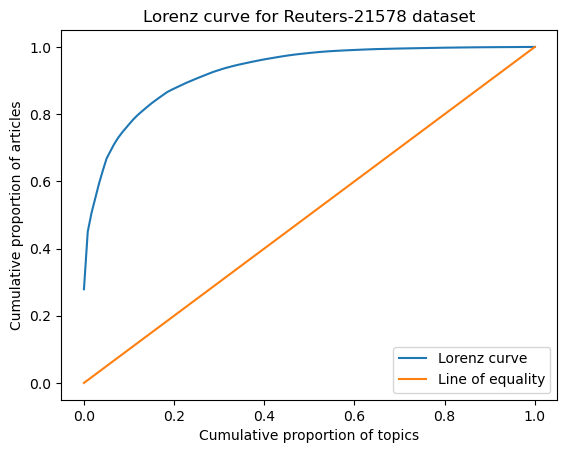

In [102]:
# Plot the Lorenz curve
fig, ax = plt.subplots()
ax.plot(lorenz_curve_x, lorenz_curve_y, label='Lorenz curve')
ax.plot([0,1], [0,1], label='Line of equality')
ax.legend()

# Add labels and title
ax.set_xlabel('Cumulative proportion of topics')
ax.set_ylabel('Cumulative proportion of articles')
ax.set_title('Lorenz curve for Reuters-21578 dataset')

# Show the plot
plt.show()